***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [5]:
salario_minimo = 788
mini = dados.Renda.min()
maxi = dados.Renda.max()
print(mini,maxi)

0 200000


In [6]:
classes = [
    mini, 
    2 * salario_minimo,
    5 * salario_minimo,
    15 * salario_minimo,
    25 * salario_minimo,
    maxi
]
classes

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [7]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [16]:
frequencia = pd.value_counts(pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True)
)
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [17]:
percentual = pd.value_counts(pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest = True), normalize = True
)
percentual

E    0.647514
D    0.242087
C    0.094235
B    0.010698
A    0.005466
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [24]:
tab_freq = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
tab_freq.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,420,0.005466
B,822,0.010698
C,7241,0.094235
D,18602,0.242087
E,49755,0.647514


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot:>

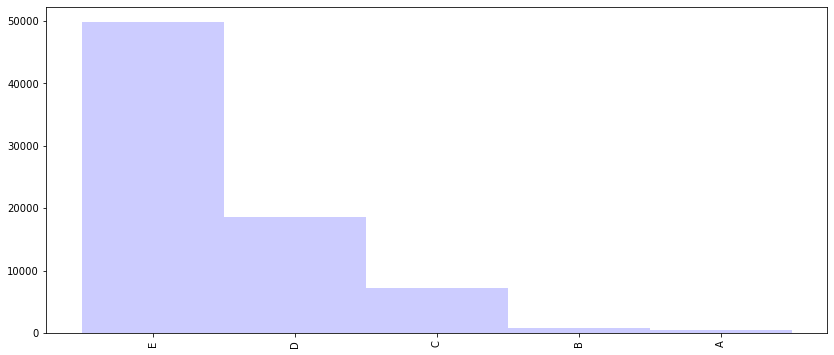

In [36]:
tab_freq['Frequência'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize=(14, 6))

> ### Conclusões

Através dos dados evidênciados na tabela de frequência e gráfico de barras, notamos que mais da metade da amostra possui renda abaixo de 2 salários mínimos (aproximadamente 65% possui renda < R$ 1.576,00), estando na Classe 'E'. 
Cerca de 24% possui renda entre 2 salários mínmos e 5 salários mínimos, ou seja, classe D.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Histograma - Idade'}, xlabel='Idade', ylabel='Frequência'>

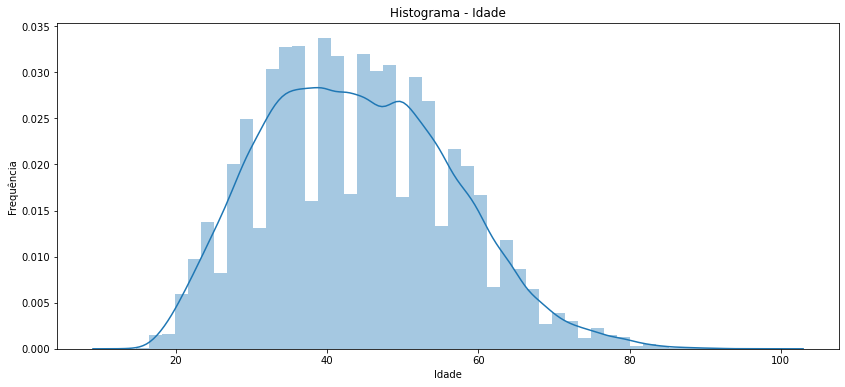

In [41]:
ax = sns.distplot(dados.Idade)
ax.figure.set_size_inches(14, 6)
ax.set_title('Histograma - Idade')
ax.set_xlabel('Idade')
ax.set_ylabel('Frequência')
ax

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Histograma - Altura'}, xlabel='Metros', ylabel='Frequência'>

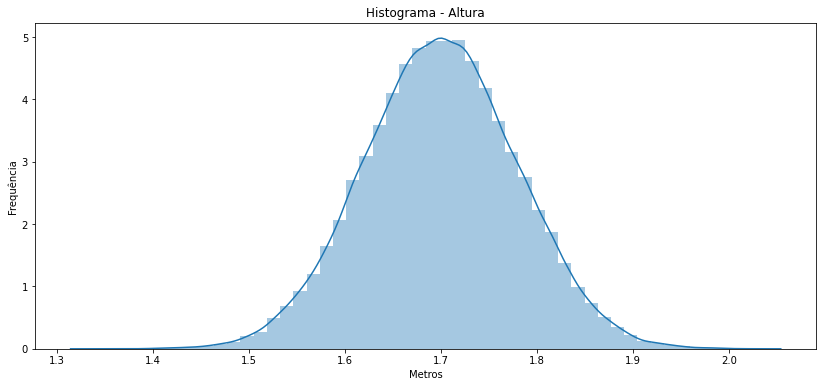

In [42]:
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(14, 6)
ax.set_title('Histograma - Altura')
ax.set_xlabel('Metros')
ax.set_ylabel('Frequência')
ax

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Histograma - Renda'}, xlabel='R$', ylabel='Frequência'>

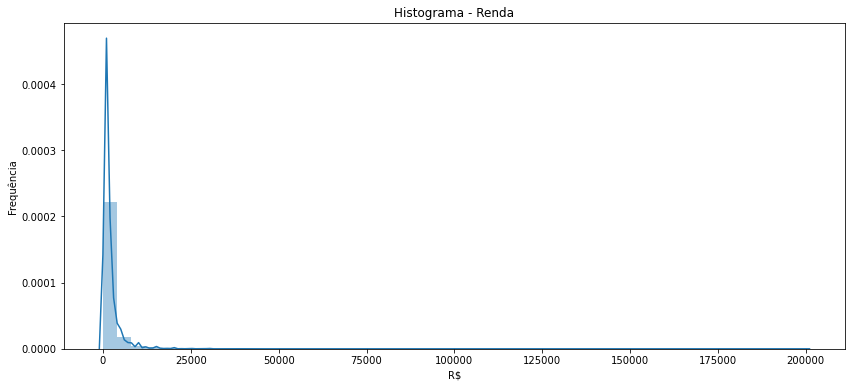

In [66]:
ax = sns.distplot(dados.Renda)
ax.figure.set_size_inches(14, 6)
ax.set_title('Histograma - Renda')
ax.set_xlabel('R$')
ax.set_ylabel('Frequência')
ax

> ### Conclusões

Acerca do Histograma da variável Idade, nota-se uma distribuição normal, com uma leve assimetria a direita.

Acerca do Histograma da variável Altura, nota-se uma distribuição normal, simétrica. 

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Histograma - Distribuição de frequência - Renda até R$ 20.000,00'}, xlabel='R$', ylabel='Frequência'>

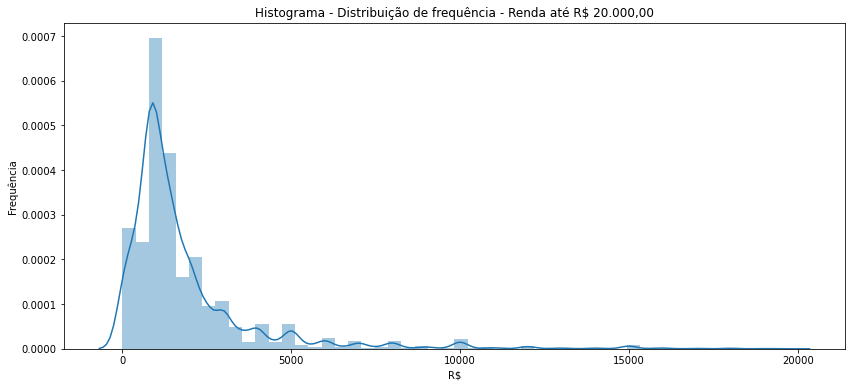

In [45]:
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(14, 6)
ax.set_title('Histograma - Distribuição de frequência - Renda até R$ 20.000,00')
ax.set_xlabel('R$')
ax.set_ylabel('Frequência')
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [46]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [47]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [50]:
frequencia = pd.crosstab(dados.Sexo,dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor,  inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [51]:
percentual = pd.crosstab(dados.Sexo,dados.Cor, normalize = True)
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor,  inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.003332,0.288834,0.071603,0.003058,0.326171
Feminino,0.001314,0.125208,0.037598,0.001523,0.141359


> ### Conclusões

Através das tabelas de frequência e percentual, verificamos que os chefes das famílias, em grande maioria são homens, em todas as categorias de cor. A cor que possui um maior percentual é a Parda, com 32% para homens e 14% para as mulheres.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [55]:
media_renda = dados.Renda.mean()
media_renda

2000.3831988547631

### Obtenha a mediana

In [56]:
mediana_renda = dados.Renda.median()
mediana_renda

1200.0

### Obtenha a moda

In [58]:
moda_renda = dados.Renda.mode()[0]
moda_renda

788

### Obtenha o desvio médio absoluto

In [63]:
dma_renda = dados.Renda.mad()
dma_renda

1526.4951371644931

### Obtenha a variância

In [64]:
var_renda = dados.Renda.var()
var_renda

11044906.00622118

### Obtenha o desvio-padrão

In [65]:
std_renda = dados.Renda.std()
std_renda

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [67]:
renda_sex_cor = pd.crosstab(dados.Cor,dados.Sexo, values = dados.Renda,
                        aggfunc = {'mean', 'median', 'max'})
renda_sex_cor.rename(index = cor, inplace = True)
renda_sex_cor.rename(columns = sexo,  inplace = True)
renda_sex_cor

max                   mean                 median         
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                      
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

Através da tabela, percebemos que para todas as categorias de cores (exceto Indígena), o sexo Masculino possui renda superior ao sexo Feminino. Além disso, fica evidente que a categoria de cor Branca possui maiores valores se comparado as demais categorias. 

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [68]:
renda_disp_sex_cor = pd.crosstab(dados.Cor,dados.Sexo, values = dados.Renda,
                        aggfunc = {'mad', 'var', 'std'})
renda_disp_sex_cor.rename(index = cor, inplace = True)
renda_disp_sex_cor.rename(columns = sexo,  inplace = True)
renda_disp_sex_cor

mad                       std                         var  \
Sexo        Masculino     Feminino    Masculino      Feminino     Masculino   
Cor                                                                           
Indígena   798.910889  3007.892952  1204.093490  11957.498292  1.449841e+06   
Branca    2261.012346  1670.967106  4750.791872   3251.013154  2.257002e+07   
Preta      975.602482   705.453357  1936.309271   1349.799809  3.749294e+06   
Amarela   3709.597211  2549.146322  5740.824820   3731.173660  3.295707e+07   
Parda     1125.827704   811.580946  2312.087184   1596.233048  5.345747e+06   

                        
Sexo          Feminino  
Cor                     
Indígena  1.429818e+08  
Branca    1.056909e+07  
Preta     1.821960e+06  
Amarela   1.392166e+07  
Parda     2.547960e+06

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:title={'center':'Boxplot - Renda por Sexo e Cor'}, xlabel='R$', ylabel='Cor'>

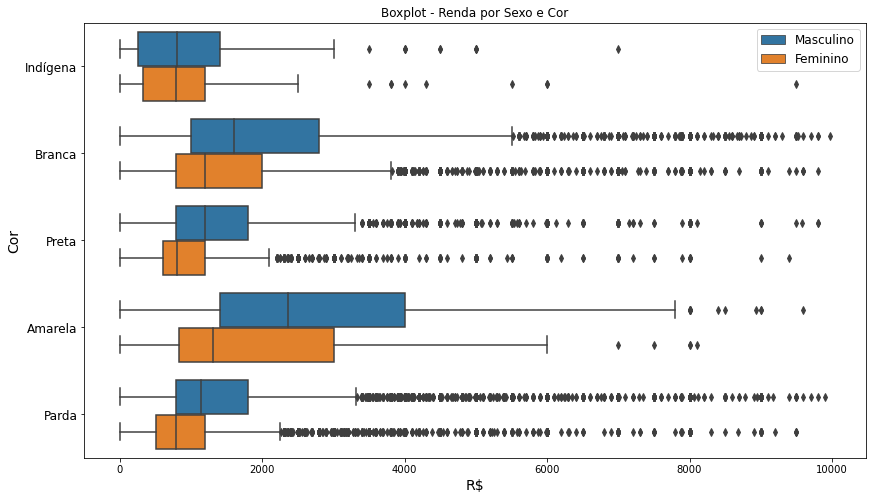

In [81]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(14,8) #ajustando o tamanho do gráfico
ax.set_title('Boxplot - Renda por Sexo e Cor') #Título do gráfico
ax.set_xlabel('R$', fontsize = 14)
ax.set_ylabel('Cor', fontsize = 14)
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda'], fontsize = 12)
# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino','Feminino'], fontsize = 12)
ax

> ### Conclusões

Verifica-se uma diferença bastante notável tanto por cor, quanto por sexo. Podemos notar que para a categoria de cor Amarela, a mesma apresenta uma mediana maior para o Sexo Masculino. Fácil notar também que para todas as cores, a mediana do Sexo masculino é superior ao sexo feminino.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [82]:
from scipy import stats

percentual = stats.percentileofscore(dados.Renda, 788, kind = 'weak')
print("{0:.2f}%".format(percentual))

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [86]:
valor = dados.Renda.quantile(.99)
print('R$ {0:.2f}'.format(valor))

R$ 15000.00



### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [89]:
renda_sex_anos_estudos = pd.crosstab(dados['Anos de Estudo'], dados.Sexo, values = dados.Renda, aggfunc = {'mean','median','max','std'})
renda_sex_anos_estudos.rename(index = anos_de_estudo, inplace = True) #renomeando e substituindo o Index
renda_sex_anos_estudos.rename(columns = sexo, inplace = True) #renomeando e substituindo a Coluna Sexo
renda_sex_anos_estudos

max                   mean               \
Sexo                           Masculino  Feminino    Masculino     Feminino   
Anos de Estudo                                                                 
Sem instrução e menos de 1 ano   30000.0   10000.0   799.494638   516.201748   
1 ano                            30000.0    2000.0   895.629047   492.771987   
2 anos                           40000.0    4000.0   931.178986   529.911638   
3 anos                           80000.0    3500.0  1109.203862   546.853916   
4 anos                           50000.0   10000.0  1302.329283   704.279111   
5 anos                           35000.0    8000.0  1338.653218   781.389776   
6 anos                           25000.0    6000.0  1448.875419   833.732824   
7 anos                           40000.0    9000.0  1465.497940   830.751004   
8 anos                           30000.0   18000.0  1639.396667   933.615351   
9 anos                           60000.0   20000.0  1508.038850   868.021700   
10 anos                          45000.0    6000.0  1731.270847   925.919225   
11 anos                         200000.0  100000.0  2117.060504  1286.790889   
12 anos                          30000.0  120000.0  2470.330776  1682.313725   
13 anos                          25000.0   20000.0  3195.099154  1911.730047   
14 anos                          50000.0   20000.0  3706.620269  2226.460457   
15 anos ou mais                 200000.0  100000.0  6134.279790  3899.513231   
Não determinados                  7000.0    3000.0  1295.761905   798.174419   

                                  median                   std               
Sexo                           Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano     700.0    390.0  1023.904884   639.311534  
1 ano                              788.0    400.0  1331.950552   425.291842  
2 anos                             788.0    450.0  1435.173827   498.234168  
3 anos                             800.0    500.0  2143.800133   424.124446  
4 anos                            1000.0    788.0  1419.821787   629.553397  
5 anos                            1045.0    788.0  1484.650587   635.782641  
6 anos                            1200.0    788.0  1476.628602   574.547028  
7 anos                            1200.0    788.0  1419.708673   602.038029  
8 anos                            1300.0    800.0  1515.583715   896.781213  
9 anos                            1200.0    788.0  2137.664774   973.221652  
10 anos                           1218.0    800.0  2078.609734   620.611907  
11 anos                           1500.0   1000.0  2676.538942  1819.040417  
12 anos                           1800.0   1200.0  2268.081538  4851.833513  
13 anos                           2400.0   1300.0  2797.116800  2053.789771  
14 anos                           2500.0   1600.0  3987.214974  2064.083336  
15 anos ou mais                   4000.0   2800.0  7447.613594  4212.770709  
Não determinados                  1200.0    788.0   979.648745   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:title={'center':'Boxplot - Renda por Sexo e Anos de Estudo'}, xlabel='R$', ylabel='Anos de Estudo'>

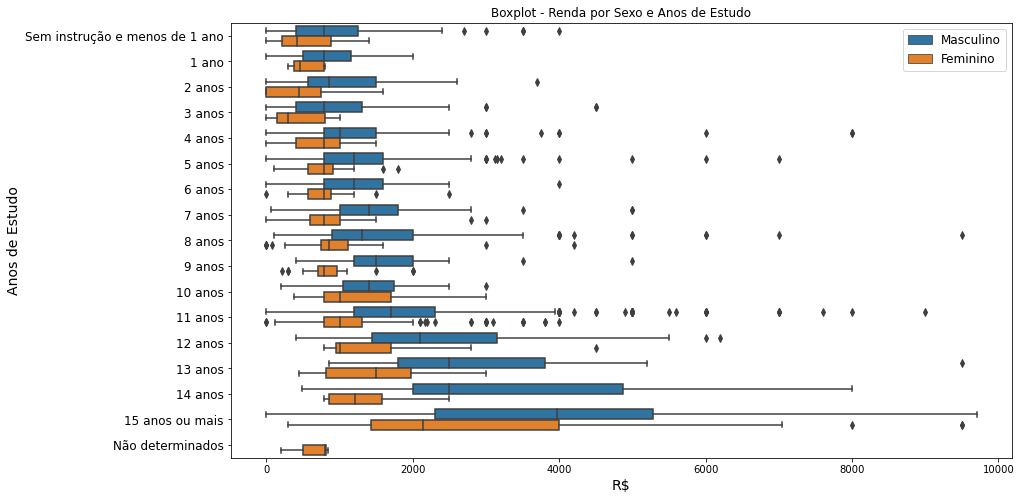

In [90]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data = dados.query('Renda < 10000 and Idade == 40'), orient = 'h')
ax.figure.set_size_inches(14,8) #ajustando o tamanho do gráfico
ax.set_title('Boxplot - Renda por Sexo e Anos de Estudo') #Título do gráfico
ax.set_xlabel('R$', fontsize = 14)
ax.set_ylabel('Anos de Estudo', fontsize = 14)
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize = 12)
# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino','Feminino'], fontsize = 12)
ax

<AxesSubplot:title={'center':'Boxplot - Renda por Sexo e Anos de Estudo'}, xlabel='R$', ylabel='Anos de Estudo'>

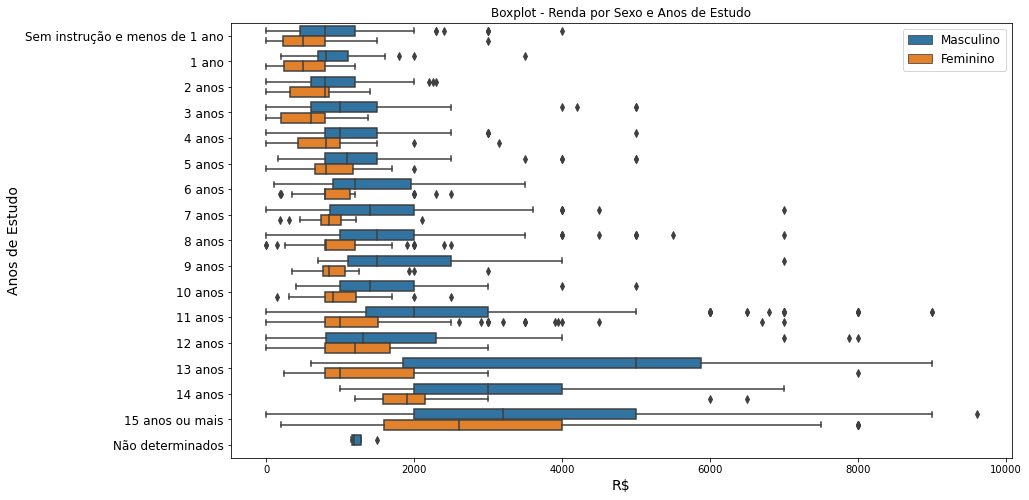

In [91]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data = dados.query('Renda < 10000 and Idade == 50'), orient = 'h')
ax.figure.set_size_inches(14,8) #ajustando o tamanho do gráfico
ax.set_title('Boxplot - Renda por Sexo e Anos de Estudo') #Título do gráfico
ax.set_xlabel('R$', fontsize = 14)
ax.set_ylabel('Anos de Estudo', fontsize = 14)
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize = 12)
# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino','Feminino'], fontsize = 12)
ax

> ### Conclusões

Novamente, percebe-se que a renda do Sexo Masculino é superior à renda do sexo Feminino.
Além disso, nota-se que, quanto mais anos de estudo, maior a renda. 

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [98]:
renda_uf = dados.groupby(['UF']).agg({'Renda': ['mean','median','max','std']})
renda_uf.rename(index = uf, inplace = True)
renda_uf

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

In [99]:
#Separando a Renda por UF pelo Sexo, através do método Crosstab

renda_uf_sexo = pd.crosstab(dados['UF'], dados.Sexo, values = dados.Renda, aggfunc = {'mean','median','max','std'})
renda_uf_sexo.rename(index = uf, inplace = True) #renomeando e substituindo o Index
renda_uf_sexo.rename(columns = sexo, inplace = True) #renomeando e substituindo a Coluna Sexo
renda_uf_sexo

max                   mean                 median  \
Sexo                Masculino  Feminino    Masculino     Feminino Masculino   
UF                                                                            
Rondônia              50000.0   12500.0  1921.209139  1414.854637    1300.0   
Acre                  30000.0   15000.0  1635.342407  1128.615063    1000.0   
Amazonas              22000.0   15000.0  1539.989460  1235.832849    1000.0   
Roraima               20000.0   18000.0  1875.788136  1608.112903    1125.0   
Pará                  50000.0   16000.0  1509.741894  1131.884114     980.0   
Amapá                 15000.0   15580.0  1930.396970  1736.164835    1337.5   
Tocantins             60000.0    9000.0  1912.509395  1381.798851    1100.0   
Maranhão              30000.0    8500.0  1165.172097   723.752542     788.0   
Piauí                 40000.0   30000.0  1146.710618   899.858757     788.0   
Ceará                 25000.0   24000.0  1341.616974  1085.795053     800.0   
Rio Grande do Norte   15500.0   12000.0  1459.050074  1080.676871     820.0   
Paraíba               30000.0   12200.0  1364.993348  1119.704301     800.0   
Pernambuco            50000.0   30000.0  1664.931211  1252.239812    1000.0   
Alagoas               10000.0   11000.0  1157.752593  1105.473684     788.0   
Sergipe               16000.0   10000.0  1205.569857   877.150794     800.0   
Bahia                200000.0   30000.0  1557.495271  1175.015175     900.0   
Minas Gerais         100000.0   30000.0  2283.158288  1489.616576    1400.0   
Espírito Santo        40000.0  100000.0  2129.324226  1752.707022    1500.0   
Rio de Janeiro       200000.0  120000.0  2777.552792  1971.532508    1510.0   
São Paulo             80000.0   50000.0  2947.742872  1950.176471    1820.0   
Paraná               200000.0   25000.0  2767.429211  1796.263244    1800.0   
Santa Catarina        80000.0   13000.0  2688.304121  1792.114130    2000.0   
Rio Grande do Sul     35000.0   25000.0  2488.392840  1960.845376    1600.0   
Mato Grosso do Sul    42000.0   25000.0  2603.484296  1519.891832    1600.0   
Mato Grosso           35000.0   20000.0  2335.347994  1604.293651    1576.0   
Goiás                 30000.0   26000.0  2222.632558  1339.376392    1500.0   
Distrito Federal     100000.0   30000.0  4863.366321  3269.883895    2500.0   

                                      std               
Sexo                Feminino    Masculino     Feminino  
UF                                                      
Rondônia              1000.0  2644.124716  1476.688370  
Acre                   788.0  2493.549324  1405.459802  
Amazonas               800.0  1878.401328  1436.591274  
Roraima                875.0  2138.133218  1957.175909  
Pará                   788.0  2209.084120  1587.778044  
Amapá                  920.0  1984.400879  2084.577964  
Tocantins              788.0  3291.585681  1516.365583  
Maranhão               480.0  2186.972819   981.791872  
Piauí                  600.0  2485.364779  2070.225245  
Ceará                  788.0  1842.209640  1770.042112  
Rio Grande do Norte    788.0  1764.856377  1320.503692  
Paraíba                788.0  2030.736711  1730.075019  
Pernambuco             788.0  2565.958125  1964.272952  
Alagoas                788.0  1250.908760  1200.222301  
Sergipe                665.0  1591.037351  1135.085356  
Bahia                  788.0  4070.040921  1930.916466  
Minas Gerais           900.0  3952.088549  2341.421743  
Espírito Santo         927.0  2637.156594  5160.621957  
Rio de Janeiro        1040.5  5562.918613  4446.614757  
São Paulo             1200.0  3748.021844  2767.421405  
Paraná                1200.0  4850.756071  2249.056098  
Santa Catarina        1283.5  3447.896091  1693.541576  
Rio Grande do Sul     1200.0  3049.801331  2576.786100  
Mato Grosso do Sul     988.0  3324.348704  2083.725272  
Mato Grosso           1000.0  2760.465729  1765.822300  
Goiás                  900.0  2382.046659  1497.896843  
Di

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<AxesSubplot:title={'center':'Boxplot - Renda por UF'}, xlabel='R$', ylabel='UF'>

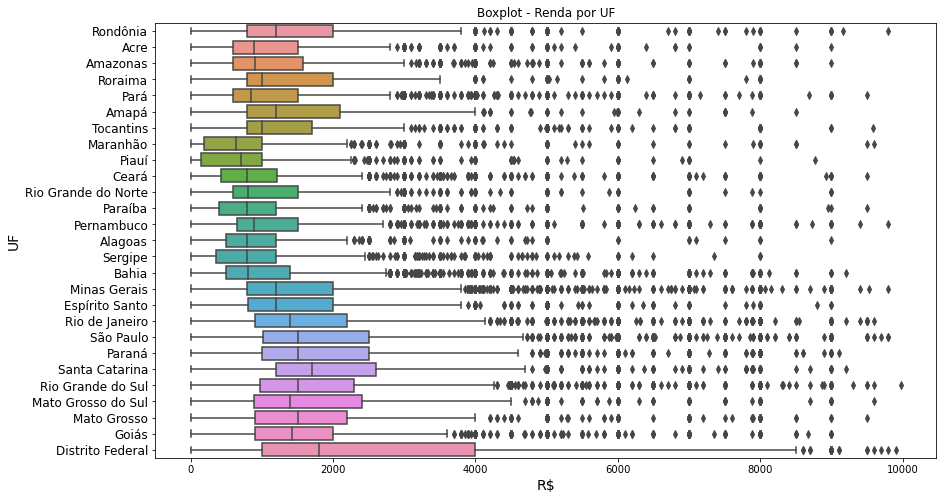

In [112]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dados.query('Renda < 10000'), orient = 'h')

ax.figure.set_size_inches(14,8) #ajustando o tamanho do gráfico
ax.set_title('Boxplot - Renda por UF') #Título do gráfico
ax.set_xlabel('R$', fontsize = 14) #Configurando o eixo x
ax.set_ylabel('UF', fontsize = 14) #configurando o eixo y
ax.set_yticklabels([key for key in uf.values()], fontsize = 12) #Renomeando as categorias do eixo y

ax

> ### Conclusões

Verifica-se que para as regiões centro-sul possuem maior renda.